In [2]:
import torch

num_samples, size, node_dim = 100000, 100, 2
data = torch.rand(num_samples, size, node_dim)

print(data.min(), data.max())

width = 256
assert width % 32 == 0, "Width should be a multiple of 32"

tensor(0.) tensor(1.0000)


# Feature 1

In [21]:
map1_for_feature1 = torch.zeros(width, width)
map2_for_feature1 = torch.zeros(width, width)
map3_for_feature1 = torch.zeros(width, width)
map4_for_feature1 = torch.zeros(width, width)

In [22]:
def recur(x, y, depth, index, width):
  cur_grid_size = width // (2 ** depth)

  if depth != 0:
    eval(f"map{depth}_for_feature1")[y:y+cur_grid_size, x:x+cur_grid_size] = index

  if depth != 4:
    next_grid_size = cur_grid_size // 2
    recur(x, y, depth + 1, 0, width)
    recur(x + next_grid_size, y, depth + 1, 1, width)
    recur(x, y + next_grid_size, depth + 1, 2, width)
    recur(x + next_grid_size, y + next_grid_size, depth + 1, 3, width)

recur(0, 0, 0, 0, width)

KeyboardInterrupt: 

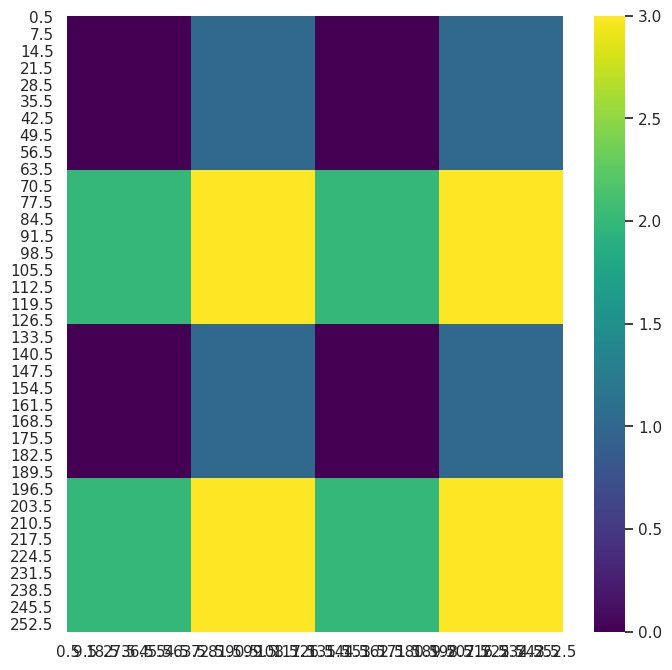

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
plt.figure(figsize=(8, 8))
sns.heatmap(map2_for_feature1, cmap='viridis', cbar=True)
plt.show()

In [26]:
import torch.nn.functional as F
num_classes = 4
map1_encoded = F.one_hot(map1_for_feature1.to(torch.int64), num_classes=num_classes)
map2_encoded = F.one_hot(map2_for_feature1.to(torch.int64), num_classes=num_classes)
map3_encoded = F.one_hot(map3_for_feature1.to(torch.int64), num_classes=num_classes)
map4_encoded = F.one_hot(map4_for_feature1.to(torch.int64), num_classes=num_classes)

feat1_cache = torch.cat([map1_encoded, map2_encoded, map3_encoded, map4_encoded], dim=-1)
print(feat1_cache.shape)
print(feat1_cache[0][0])

torch.Size([256, 256, 16])
tensor([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])


In [27]:
import torch
from tqdm import tqdm

offset = 0.5 / width
grid_x, grid_y = torch.meshgrid(torch.linspace(offset, 1 - offset, width), torch.linspace(offset, 1 - offset, width))
grid_coordinates = torch.stack((grid_x, grid_y), dim=-1).view(-1, 2)

# closest_indices = torch.cdist(data.to("cuda"), grid_coordinates.to("cuda")).argmin(dim=-1) # cuda memory issue

for idx, datum in tqdm(enumerate(data)):

  # closest_indices = torch.cdist(datum, grid_coordinates).argmin(dim=-1)
  closest_indices = torch.cdist(datum.to("cuda"), grid_coordinates.to("cuda")).argmin(dim=-1)

  X = closest_indices // width
  Y = closest_indices % width
  feat1 = feat1_cache.to("cuda")[X, Y]
  print(feat1.shape)
  # lut.[X, Y]

89it [00:00, 448.38it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

187it [00:00, 470.84it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

284it [00:00, 476.31it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

382it [00:00, 478.96it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

479it [00:01, 479.63it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

576it [00:01, 477.44it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

674it [00:01, 479.92it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

771it [00:01, 480.83it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

869it [00:01, 480.18it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

967it [00:02, 478.90it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

1005it [00:02, 475.18it/s]


torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])


KeyboardInterrupt: 

# Feature 2

0it [00:00, ?it/s]

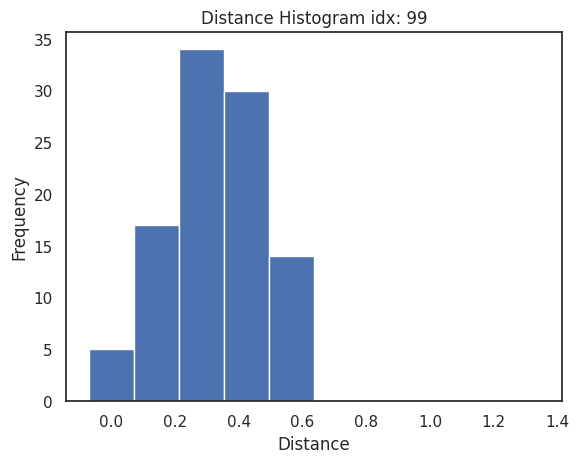

99it [00:00, 219.06it/s]


In [ ]:
import torch
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

for idx, datum in tqdm(enumerate(data)):
    if idx != 99:
        continue
    dist = torch.cdist(datum.to("cuda"), datum.to("cuda"))
    num_bins = 10
    hist_range = (0, math.sqrt(2))
    hist, bin_edges = torch.histogram(dist[idx].cpu().flatten(), bins=num_bins, range=hist_range)
    plt.bar(bin_edges[:-1], hist, width=(hist_range[1] - hist_range[0]) / num_bins)
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.title(f'Distance Histogram idx: {idx}')
    plt.show()
    break

In [25]:
import torch
from tqdm import tqdm

def count_nodes_within_distance_range(dist_matrix, distance_range):
    heatmap = (dist_matrix > distance_range[0]) & (dist_matrix <= distance_range[1])
    count_per_node = heatmap.sum(dim = -1)
    return count_per_node

def categorize(count_nodes, num_categories):
    # 0 ~ num_categories-1 의 category에 할당됨.
    bins = torch.linspace(0, count_nodes.max() + 1, num_categories).to("cuda")
    category_indices = torch.bucketize(count_nodes, bins, right = False)
    one_hot_categories = torch.nn.functional.one_hot(category_indices, num_categories)
    return one_hot_categories

# 주어진 코드를 기반으로 각 노드별로 특정 거리 범위에 속하는 노드의 개수 파악
for idx, datum in tqdm(enumerate(data)):
    dist = torch.cdist(datum.to("cuda"), datum.to("cuda"))
    max_distance = dist.max().item()
    range1 = (0, max_distance / 16)
    range2 = (0, max_distance / 8)

    count_nodes1 = count_nodes_within_distance_range(dist, range1) # range1 구간의 개수 counting, [N]
    count_nodes2 = count_nodes_within_distance_range(dist, range2) # range2 구간의 개수 counting, [N]
    
    one_hot_categories1 = categorize(count_nodes1, 8)
    one_hot_categories2 = categorize(count_nodes2, 8)
    
    feat2 = torch.concat([one_hot_categories1, one_hot_categories2], dim = -1)
    print(feat2.shape)
    
    # print(one_hot_categories1.shape)
    # print(one_hot_categories2.shape)


377it [00:00, 1892.62it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

759it [00:00, 1898.43it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

1143it [00:00, 1905.60it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

1527it [00:00, 1906.48it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

1718it [00:00, 1832.02it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

2294it [00:01, 1889.34it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

2677it [00:01, 1901.15it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

3062it [00:01, 1907.70it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

3447it [00:01, 1901.88it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

3833it [00:02, 1912.03it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

4219it [00:02, 1916.85it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

4604it [00:02, 1912.06it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

4990it [00:02, 1914.35it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

5209it [00:02, 1894.64it/s]

torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size([100, 16])
torch.Size

KeyboardInterrupt: 

# Feature 3

In [5]:
import torch
from tqdm import tqdm

def count_nodes_within_distance_range(dist_matrix, distance_range):
    heatmap = (dist_matrix > distance_range[0]) & (dist_matrix <= distance_range[1])
    count_per_node = heatmap.sum(dim=-1)
    return count_per_node

def calculate_x_axis_angle(node_positions):
    delta_x = node_positions[:, 0].unsqueeze(dim = 1) - node_positions[:, 0].unsqueeze(dim = -1)
    delta_y = node_positions[:, 1].unsqueeze(dim = 1) - node_positions[:, 1].unsqueeze(dim = -1)
    x_axis_angle = torch.atan2(delta_y, delta_x)
    return x_axis_angle

def categorize_count_nodes(count_nodes, num_categories):
    bins = torch.linspace(0, count_nodes.max() + 1, num_categories).to("cuda")
    category_indices = torch.bucketize(count_nodes, bins, right=False)
    one_hot_categories = torch.nn.functional.one_hot(category_indices, num_categories)
    return one_hot_categories

for idx, datum in tqdm(enumerate(data)):
    dist = torch.cdist(datum.to("cuda"), datum.to("cuda"))
    x_axis_angle = calculate_x_axis_angle(datum.to("cuda"))

    num_sectors = 12
    sector_angle = 2 * torch.pi / num_sectors
    
    one_hot_categories_ls = []
    for i in range(num_sectors):
        sector_start = -torch.pi + i * sector_angle
        sector_end = -torch.pi + (i + 1) * sector_angle
        in_sector_mask = (x_axis_angle > sector_start) & (x_axis_angle <= sector_end)
        
        range2 = (0, max_distance / 8)
        count_nodes_per_sector = count_nodes_within_distance_range(dist * in_sector_mask, range2)
        one_hot_categories = categorize_count_nodes(count_nodes_per_sector, 8)
        one_hot_categories_ls.append(one_hot_categories)
        
    feat3 = torch.concat(one_hot_categories_ls, dim = -1)
    
    print(f"feat3 shape: {feat3.shape}")
    break


0it [00:00, ?it/s]

feat3 shape: torch.Size([100, 96])
